In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ratings_Electronics.csv')

In [3]:
df

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [4]:
df = df.rename(columns={
    'AKM1MP6P0OYPR': 'reviewerID',
    '0132793040': 'product_id',
    '5.0': 'rating',
    '1365811200': 'date'
})

In [5]:
df

,reviewerID,product_id,rating,date
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [6]:
 df.isnull().sum()

reviewerID    0
product_id    0
rating        0
date          0
dtype: int64

In [9]:
df['userId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1WBP7XSZI6AUL      1
A2K7UNJHE9ZR0G      1
A1A6SIW6EWF6FP      1
A1JRDVWYUF8W0P      1
A10M2KEFPEQDHN      1
Name: userId, Length: 4201696, dtype: int64

In [7]:
df.columns

Index(['reviewerID', 'product_id', 'rating', 'date'], dtype='object')

In [8]:
user_id_counts = df['reviewerID'].value_counts()


len(user_id_counts[user_id_counts < 10])

4138521

In [9]:

user_ids_to_remove = user_id_counts[user_id_counts < 2].index
df = df[~df['reviewerID'].isin(user_ids_to_remove)]

In [10]:
df

,reviewerID,product_id,rating,date
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
...,...,...,...,...
7824474,A2R6Q6KJCYSVH7,BT008UKTMW,3.0,1343520000
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800


In [11]:
df.dtypes

reviewerID     object
product_id     object
rating        float64
date            int64
dtype: object

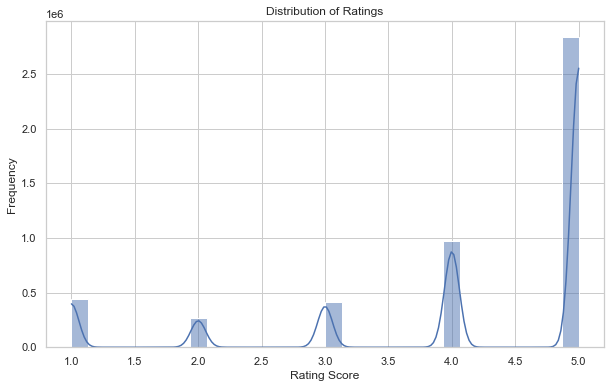

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Count unique values in userId and productId
unique_user_ids = df['reviewerID'].nunique()
unique_product_ids = df['product_id'].nunique()

print(f"Unique User IDs: {unique_user_ids}")
print(f"Unique Product IDs: {unique_product_ids}")



Unique User IDs: 1319863
Unique Product IDs: 413630


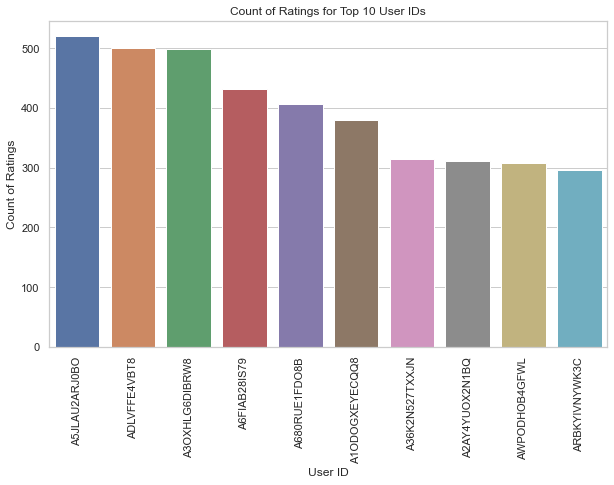

In [14]:
# Count of ratings per user
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent userIds
top_10_userIds = df['reviewerID'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with these top 10 userIds
df_top_10 = df[df['reviewerID'].isin(top_10_userIds)]

# Plot the count of ratings for the top 10 userIds
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10, x='reviewerID', order=top_10_userIds)
plt.title('Count of Ratings for Top 10 User IDs')
plt.xlabel('User ID')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=90)
plt.show()



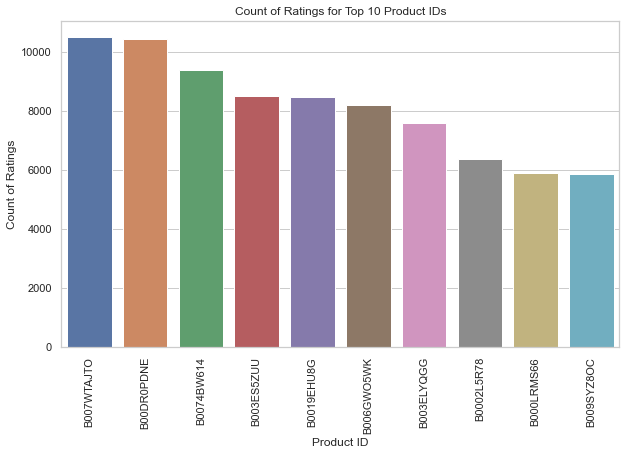

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent productIds
top_10_productIds = df['product_id'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with these top 10 productIds
df_top_10_products = df[df['product_id'].isin(top_10_productIds)]

# Plot the count of ratings for the top 10 productIds
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_products, x='product_id', order=top_10_productIds)
plt.title('Count of Ratings for Top 10 Product IDs')
plt.xlabel('Product ID')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=90)
plt.show()


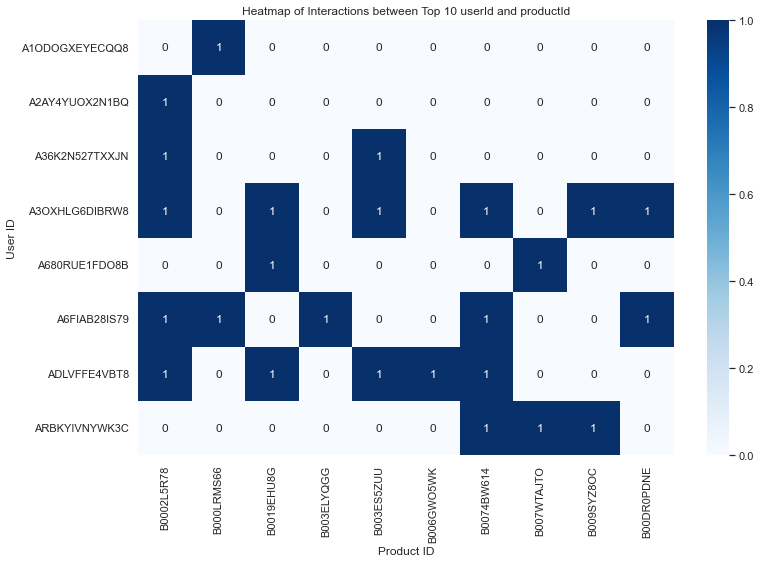

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 10 most frequent userIds
top_10_userIds = df['reviewerID'].value_counts().nlargest(10).index

# Get the top 10 most frequent productIds
top_10_productIds = df['product_id'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the rows with these top 10 userIds and top 10 productIds
df_top_10 = df[(df['reviewerID'].isin(top_10_userIds)) & (df['product_id'].isin(top_10_productIds))]

# Create a pivot table with userId as rows and productId as columns
interaction_matrix = df_top_10.pivot_table(index='reviewerID', columns='product_id', values='rating', aggfunc='count', fill_value=0)

# Plot a heatmap of the interactions between top 10 userId and productId
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='Blues', cbar=True, annot=True, fmt="d")
plt.title('Heatmap of Interactions between Top 10 userId and productId')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.show()


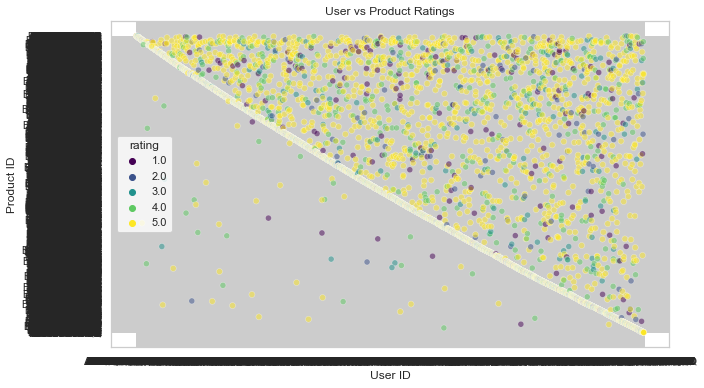

In [17]:
# Using a sample to avoid large data issues
df_sample = df.sample(n=min(10000, len(df)), random_state=42)  # Sample for visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='reviewerID', y='product_id', hue='rating', palette='viridis', alpha=0.5)
plt.title('User vs Product Ratings')
plt.xlabel('User ID')
plt.ylabel('Product ID')
plt.show()

